In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset = pd.read_csv('/content/creditcard.csv')

In [8]:
dataset.shape

(284807, 31)

In [9]:
dataset.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
pd.value_counts(dataset['Class'])

<ipython-input-11-730eccfa18e4>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(dataset['Class'])


,count
Class,
0,284315
1,492


<Axes: xlabel='Class', ylabel='count'>

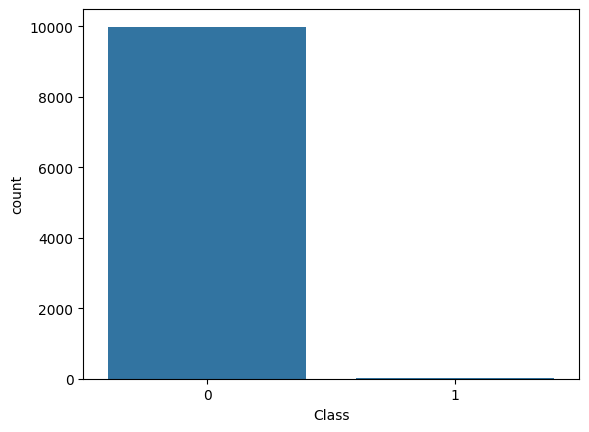

In [12]:
import seaborn as sns
import pandas as pd

# Assuming your dataset is in a CSV file named 'your_dataset.csv'
dataset = pd.read_csv('creditcard.csv') # Load your dataset here

# Sample the dataset before plotting
sample_size = 10000 # Adjust as needed
sample_data = dataset['Class'].sample(sample_size)
sns.countplot(x=sample_data)

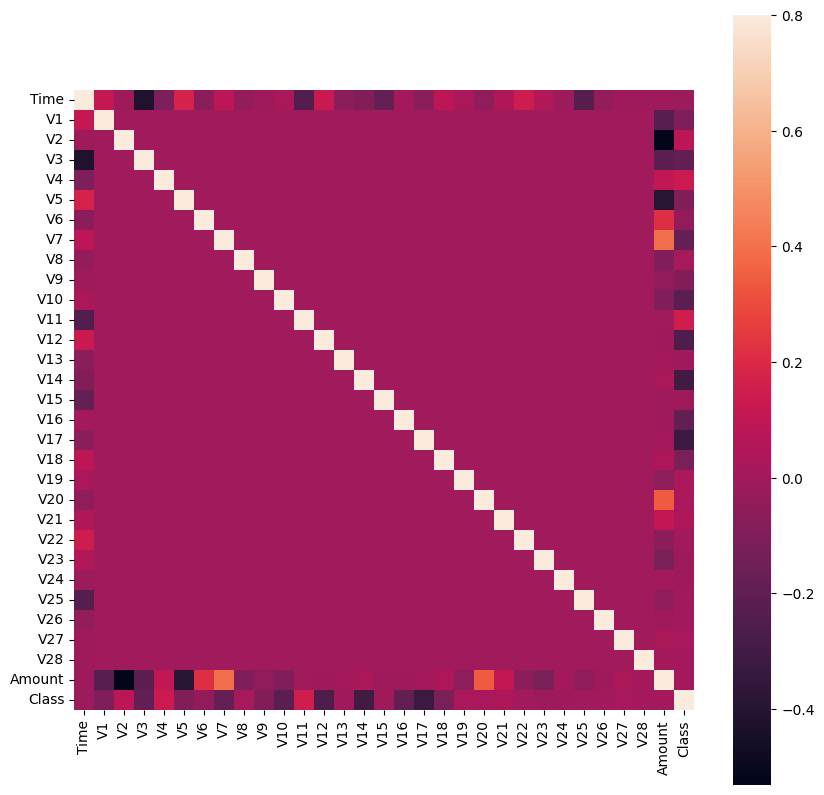

In [13]:
corrmat = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True)
plt.show()

In [14]:
len(dataset[dataset['Class']==0]) #valid transaction

284315

In [15]:
len(dataset[dataset['Class']==1]) #fradulent transactions

492

In [16]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values


In [18]:
#convert imbalanced data to balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res , y_res = ros.fit_resample(X,y)

In [19]:
X.shape

(284807, 30)

In [20]:
x_res.shape

(568630, 30)

In [21]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


In [22]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size=0.3 , random_state=42)


In [23]:
x_train.shape

(398041, 30)

In [24]:
y_train.shape


(398041,)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Data Scaling:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # Apply scaling to training data

classifier = RandomForestClassifier(n_estimators=100,
                                    random_state=0,
                                    n_jobs=-1,
                                    max_depth=10,
                                    max_features='sqrt',

                                    )
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=0)

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
n_errors = (y_pred != y_test).sum()

In [30]:
n_errors

32536

In [31]:
y_test.shape

(170589,)

0.8092725791229212


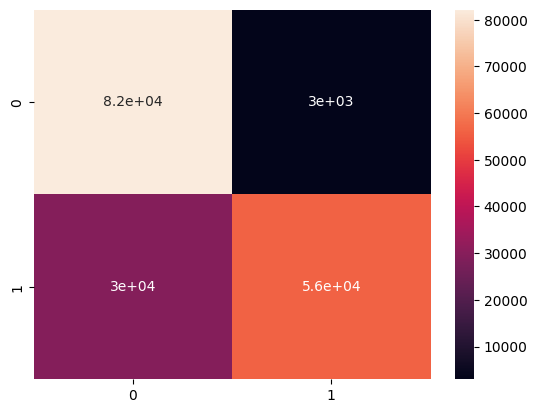

In [32]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test , y_pred)

0.9493290300662477

In [34]:
from sklearn.metrics import recall_score
recall_score(y_test , y_pred)

0.6541081460674157

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83     85149
           1       0.95      0.65      0.77     85440

    accuracy                           0.81    170589
   macro avg       0.84      0.81      0.80    170589
weighted avg       0.84      0.81      0.80    170589

